# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
# Number of bookings done through internet
internet_bookings = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100

# Number of bookings done through phone call
phone_bookings = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

# Percentage of round trips
round_trip_percentage = (df[df['trip_type'] == 'RoundTrip'].shape[0] / df.shape[0]) * 100

# Percentage of One way trips
one_way_percentage = (df[df['trip_type'] == 'OneWay'].shape[0] / df.shape[0]) * 100

# Percentage of circle trips
circle_trip_percentage = (df[df['trip_type'] == 'CircleTrip'].shape[0] / df.shape[0]) * 100

# Display the results
print("Number of bookings done through internet:", internet_bookings)
print("Number of bookings done through phone call:", phone_bookings)
print("Percentage of round trips:", round_trip_percentage)
print("Percentage of One way trips:", one_way_percentage)
print("Percentage of circle trips:", circle_trip_percentage)

Number of bookings done through internet: 88.764
Number of bookings done through phone call: 11.236
Percentage of round trips: 98.994
Percentage of One way trips: 0.774
Percentage of circle trips: 0.232


In [10]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

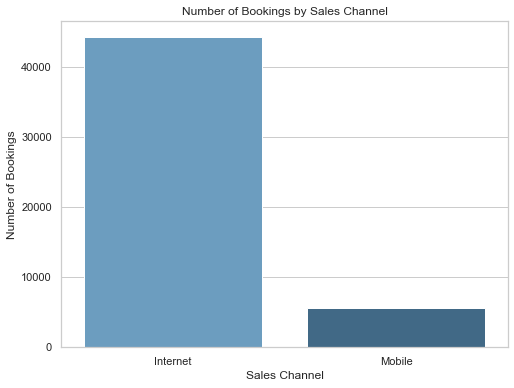

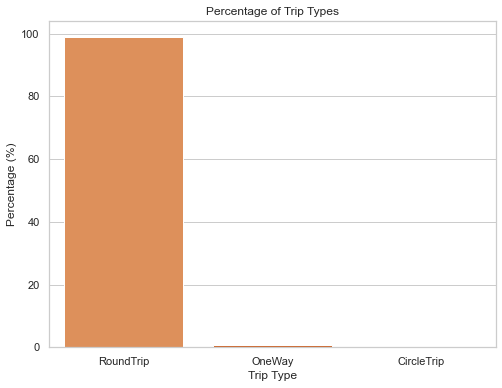

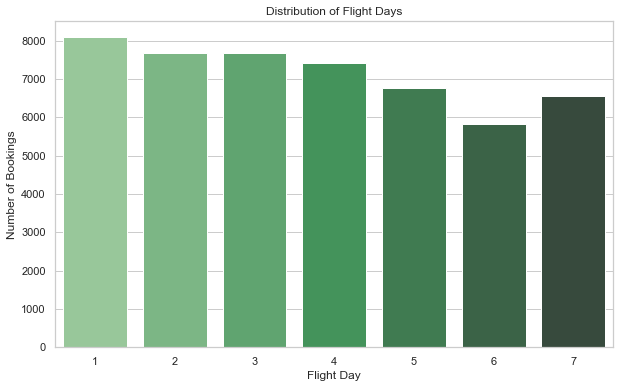

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Visualize number of bookings done through different channels
channel_counts = df['sales_channel'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Blues_d")
plt.title('Number of Bookings by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Bookings')
plt.show()

# Visualize percentage of different trip types
trip_types = ['RoundTrip', 'OneWay', 'CircleTrip']
trip_counts = [round_trip_percentage, one_way_percentage, circle_trip_percentage]
plt.figure(figsize=(8, 6))
sns.barplot(x=trip_types, y=trip_counts, palette="Oranges_d")
plt.title('Percentage of Trip Types')
plt.xlabel('Trip Type')
plt.ylabel('Percentage (%)')
plt.show()

# Visualize distribution of flight days
flight_day_counts = df['flight_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=flight_day_counts.index, y=flight_day_counts.values, palette="Greens_d")
plt.title('Distribution of Flight Days')
plt.xlabel('Flight Day')
plt.ylabel('Number of Bookings')
plt.show()



<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

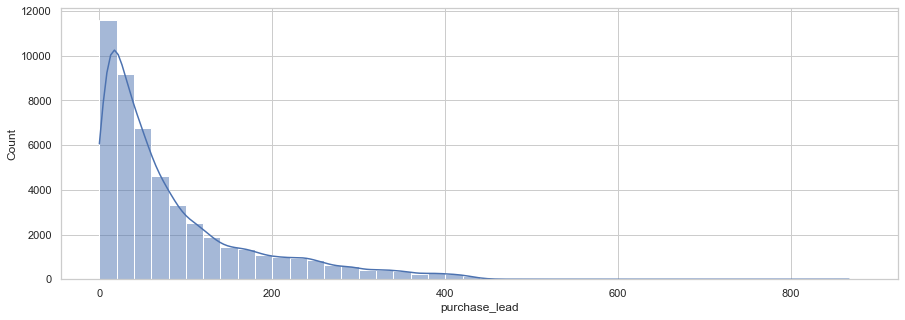

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

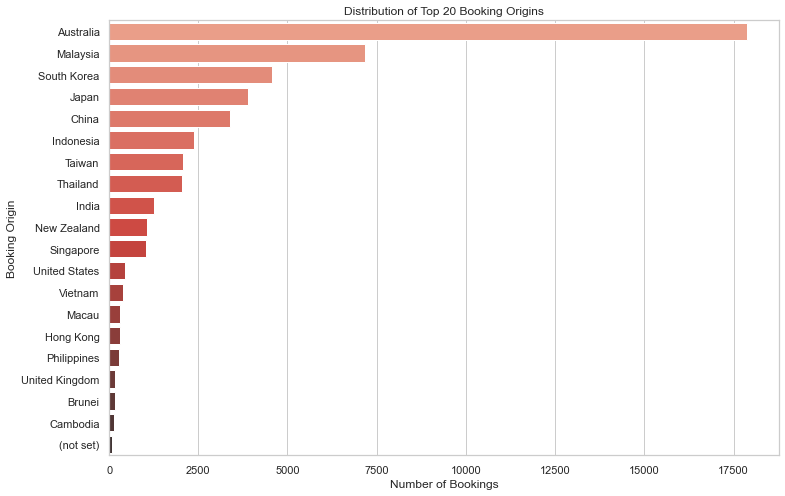

In [13]:
# Get the top 20 booking origins
top_20_booking_origins = df['booking_origin'].value_counts().nlargest(20)

# Visualize distribution of top 20 booking origins
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_booking_origins.values, y=top_20_booking_origins.index, palette="Reds_d")
plt.title('Distribution of Top 20 Booking Origins')
plt.xlabel('Number of Bookings')
plt.ylabel('Booking Origin')
plt.show()


In [14]:
# Count the number of successfully completed bookings
successful_bookings = df[df['booking_complete'] == 1].shape[0]

print("Number of successfully completed bookings:", successful_bookings)


Number of successfully completed bookings: 7478


In [15]:
# Calculate the percentage of successfully completed bookings
percentage_successful_bookings = (successful_bookings / 50000) * 100

print("Percentage of successfully completed bookings:", percentage_successful_bookings, "%")


Percentage of successfully completed bookings: 14.956 %


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Define features and target variable
X = encoded_data.drop('booking_complete', axis=1)
y = encoded_data['booking_complete']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Training and evaluation
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print()
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print()


Training Logistic Regression...
Confusion Matrix for Logistic Regression:
[[8383  137]
 [1347  133]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.49      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000


Training Random Forest...
Confusion Matrix for Random Forest:
[[8358  162]
 [1292  188]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000




In [17]:
from sklearn.metrics import accuracy_score

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Training and evaluation
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print(f"Accuracy for {name}: {accuracy:.2f}")


Training Logistic Regression...
Accuracy for Logistic Regression: 0.85
Training Random Forest...
Accuracy for Random Forest: 0.86


In [18]:
from sklearn.metrics import accuracy_score

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Training and evaluation
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred_test = model.predict(X_test_scaled)
    
    # Calculate testing accuracy
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print testing accuracy
    print(f"Testing Accuracy for {name}: {testing_accuracy:.2f}")


Training Logistic Regression...
Testing Accuracy for Logistic Regression: 0.85
Training Random Forest...
Testing Accuracy for Random Forest: 0.85


In [19]:
import numpy as np
# Define the size of the sample data
sample_size = 1000

# Generate sample data with the 'booking_complete' column
sample_data = pd.DataFrame({
    'num_passengers': np.random.randint(1, 4, sample_size),
    'sales_channel': np.random.choice(['Internet', 'Phone'], sample_size),
    'trip_type': np.random.choice(['RoundTrip', 'OneWay', 'CircleTrip'], sample_size),
    'purchase_lead': np.random.randint(1, 500, sample_size),
    'length_of_stay': np.random.randint(1, 30, sample_size),
    'flight_hour': np.random.randint(1, 24, sample_size),
    'flight_day': np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], sample_size),
    'route': np.random.choice(['AKLDEL', 'DELAKL'], sample_size),
    'booking_origin': np.random.choice(['New Zealand', 'India'], sample_size),
    'wants_extra_baggage': np.random.randint(0, 2, sample_size),
    'wants_preferred_seat': np.random.randint(0, 2, sample_size),
    'wants_in_flight_meals': np.random.randint(0, 2, sample_size),
    'flight_duration': np.random.uniform(1, 10, sample_size),
    'booking_complete': np.random.randint(0, 2, sample_size)  # Assuming binary classification
})

# Display the sample data
sample_data.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Phone,CircleTrip,445,12,6,Wed,DELAKL,India,0,1,1,1.865472,0
1,2,Phone,OneWay,176,11,20,Thu,DELAKL,New Zealand,1,0,0,4.190384,0
2,1,Phone,RoundTrip,430,14,7,Sun,AKLDEL,New Zealand,0,0,0,9.637032,1
3,3,Phone,OneWay,378,13,16,Sun,AKLDEL,India,0,0,0,5.532303,0
4,1,Phone,RoundTrip,177,23,9,Mon,DELAKL,New Zealand,0,1,0,7.732999,0


In [20]:
#encoded_sample_data = pd.get_dummies(sample_data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
#X_sample = encoded_sample_data.drop('booking_complete', axis=1)
#X_sample_scaled = scaler.transform(X_sample)  # Use the same scaler used for training data

# Preprocess the sample data
encoded_sample_data = pd.get_dummies(sample_data, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
X_sample = encoded_sample_data.drop('booking_complete', axis=1)
X_sample= X_sample.reindex(columns=X.columns, fill_value=0)
X_sample_scaled = scaler.transform(X_sample)  # Use the same scaler used for training data

# Test the trained models on sample data
for name, model in models.items():
    y_pred_sample = model.predict(X_sample_scaled)
    
    # Calculate accuracy on sample data
    sample_accuracy = accuracy_score(encoded_sample_data['booking_complete'], y_pred_sample)
    
    # Print the accuracy on sample data
    print(f"Testing Accuracy for {name} on sample data: {sample_accuracy:.2f}")

Testing Accuracy for Logistic Regression on sample data: 0.51
Testing Accuracy for Random Forest on sample data: 0.51


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model pipeline
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)  # Increase max_iter
)

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'logisticregression__penalty': ['l1', 'l2']  # Regularization penalty
}

# Perform grid search cross-validation
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params_lr = grid_search_lr.best_params_
best_accuracy_lr = grid_search_lr.best_score_
print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Accuracy for Logistic Regression:", best_accuracy_lr)

# Use the best model found by grid search
best_lr_model = grid_search_lr.best_estimator_
best_lr_model.fit(X_train, y_train)
y_pred_test_lr = best_lr_model.predict(X_test)
testing_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
print("Testing Accuracy for Logistic Regression:", testing_accuracy_lr)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

Best Parameters for Logistic Regression: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}
Best Accuracy for Logistic Regression: 0.8481249999999999
Testing Accuracy for Logistic Regression: 0.8529


In [22]:
param_grid_rf = {
    'n_estimators': [100, 200],  # Reduce the number of estimators
    'max_depth': [None, 10],  # Limit the range of maximum depth
    'min_samples_split': [2, 5],  # Limit the range of minimum samples split
    'min_samples_leaf': [1, 2]  # Limit the range of minimum samples leaf
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, n_iter=5, cv=3, scoring='accuracy')  # Randomized search with limited iterations
random_search_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring='accuracy')

In [25]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy')  # Set cv=3


In [26]:
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)  # Use all available CPU cores


In [27]:
X_train_downsampled, _, y_train_downsampled, _ = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform randomized search cross-validation
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf, n_iter=5, cv=3, scoring='accuracy')
random_search_rf.fit(X_train_downsampled, y_train_downsampled)

# Get the best parameters and the corresponding accuracy
best_params_rf = random_search_rf.best_params_
best_accuracy_rf = random_search_rf.best_score_
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Accuracy for Random Forest:", best_accuracy_rf)

# Use the best model found by random search
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train_downsampled, y_train_downsampled)


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best Accuracy for Random Forest: 0.8500500042504626


RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [29]:
# Evaluate the model on the validation set
y_pred_val_rf = best_rf_model.predict(X_test)
validation_accuracy_rf = accuracy_score(y_test, y_pred_val_rf)
print("Validation Accuracy for Random Forest:", validation_accuracy_rf)

Validation Accuracy for Random Forest: 0.852


In [30]:
# Use the best Random Forest model obtained from hyperparameter tuning
y_pred_sample_rf = best_rf_model.predict(X_sample_scaled)

# Use the best Logistic Regression model obtained from hyperparameter tuning
y_pred_sample_lr = best_lr_model.predict(X_sample_scaled)

sample_accuracy1 = accuracy_score(encoded_sample_data['booking_complete'], y_pred_sample_rf)
sample_accuracy2 = accuracy_score(encoded_sample_data['booking_complete'], y_pred_sample_lr)

# Print the predictions
#print("Random Forest Predictions on Sample Data:", y_pred_sample_rf)
#print("Logistic Regression Predictions on Sample Data:", y_pred_sample_lr)

In [31]:
# Print the accuracy on sample data
print(f"Testing Accuracy for Logistic Regression on sample data:{sample_accuracy1}")
    
print(f"Testing Accuracy for Random Forest on sample data: {sample_accuracy2}")

Testing Accuracy for Logistic Regression on sample data:0.506
Testing Accuracy for Random Forest on sample data: 0.505


In [32]:
# Assuming you have trained the best Random Forest model (best_rf_model) on your training data

# Get feature importances from the Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top features driving successful flight bookings:")
print(feature_importance_df.head(10))  # Print the top 10 features


Top features driving successful flight bookings:
                      Feature  Importance
870   booking_origin_Malaysia    0.169857
823  booking_origin_Australia    0.102957
2              length_of_stay    0.069018
737              route_PENTPE    0.048662
7             flight_duration    0.034776
1               purchase_lead    0.033535
3                 flight_hour    0.032727
4         wants_extra_baggage    0.029999
449              route_ICNPEN    0.020658
9        sales_channel_Mobile    0.017406


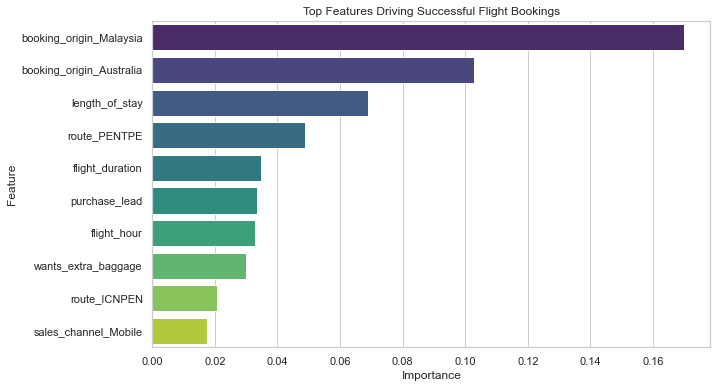

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already retrieved the feature importances and sorted them in feature_importance_df

# Plot the top N features
N = 10  # Number of top features to visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(N), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features Driving Successful Flight Bookings')
plt.show()
